In [2]:
import init_close_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Retrive a dataframe only contain columns state and states fips
db_instance = init_close_connection.connection()
conn = db_instance.connect()
state_state_fips_df = pd.read_sql_query('SELECT DISTINCT STATE, STATE_FIPS from stormdata;', conn, index_col="STATE_FIPS")
conn.close()
state_state_fips_df = state_state_fips_df.sort_values(by="STATE_FIPS", ascending=True).drop(index=0, axis=0)
state_state_fips_df

database engine created


,STATE
STATE_FIPS,
1,ALABAMA
2,ALASKA
4,ARIZONA
5,ARKANSAS
6,CALIFORNIA
...,...
95,LAKE ERIE
96,VIRGIN ISLANDS
97,AMERICAN SAMOA


In [3]:
table_name = state_state_fips_df.loc[39]['STATE'] + ' DATA SUMMARY'
conn = db_instance.connect()
geo_plot_df = pd.read_sql_query('SELECT BEGIN_LAT, BEGIN_LON, END_LAT, END_LON, EVENT_TYPE FROM `' + table_name + '` WHERE BEGIN_LAT != \'0\' and END_LAT !=\'0\';', conn)
graph_plot_df = pd.read_sql_query('SELECT BEGIN_LAT, BEGIN_LON, END_LAT, END_LON FROM `' + table_name + '` WHERE BEGIN_LAT != \'0\' and END_LAT !=\'0\' and BEGIN_LON !=\'0\' and END_LON !=\'0\';', conn, dtype=np.float64)
conn.close()
geo_plot_df[['BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON']] = geo_plot_df[['BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON']].apply(pd.to_numeric)
init_close_connection.close_final_connection(db_instance)

database connection completely disposed


In [4]:
geo_plot_df

,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_TYPE
0,40.5500,-84.5700,40.5500,-84.5700,Hail
1,38.9800,-83.3700,38.9800,-83.3700,Hail
2,39.8000,-82.7000,39.8000,-82.7000,Thunderstorm Wind
3,39.5800,-82.5300,39.5800,-82.5300,Thunderstorm Wind
4,39.6000,-82.9500,39.6000,-82.9500,Thunderstorm Wind
...,...,...,...,...,...
4637,41.2182,-81.7679,40.9305,-82.2145,Tornado
4638,41.5600,-83.4800,41.7255,-83.4843,Thunderstorm Wind
4639,40.3400,-81.0800,39.9653,-81.7163,Thunderstorm Wind
4640,41.8790,-80.7530,41.8790,-80.7530,Thunderstorm Wind


In [5]:
#import image of the state OHIO
# ohio_img = plt.imread('C:/Users/milan/Documents/School/DATA 501 project material/State maps/ohio1.PNG')
ohio_img = plt.imread('C:/Users/milan/Documents/School/DATA 501 project material/State maps/ohio2.gif')

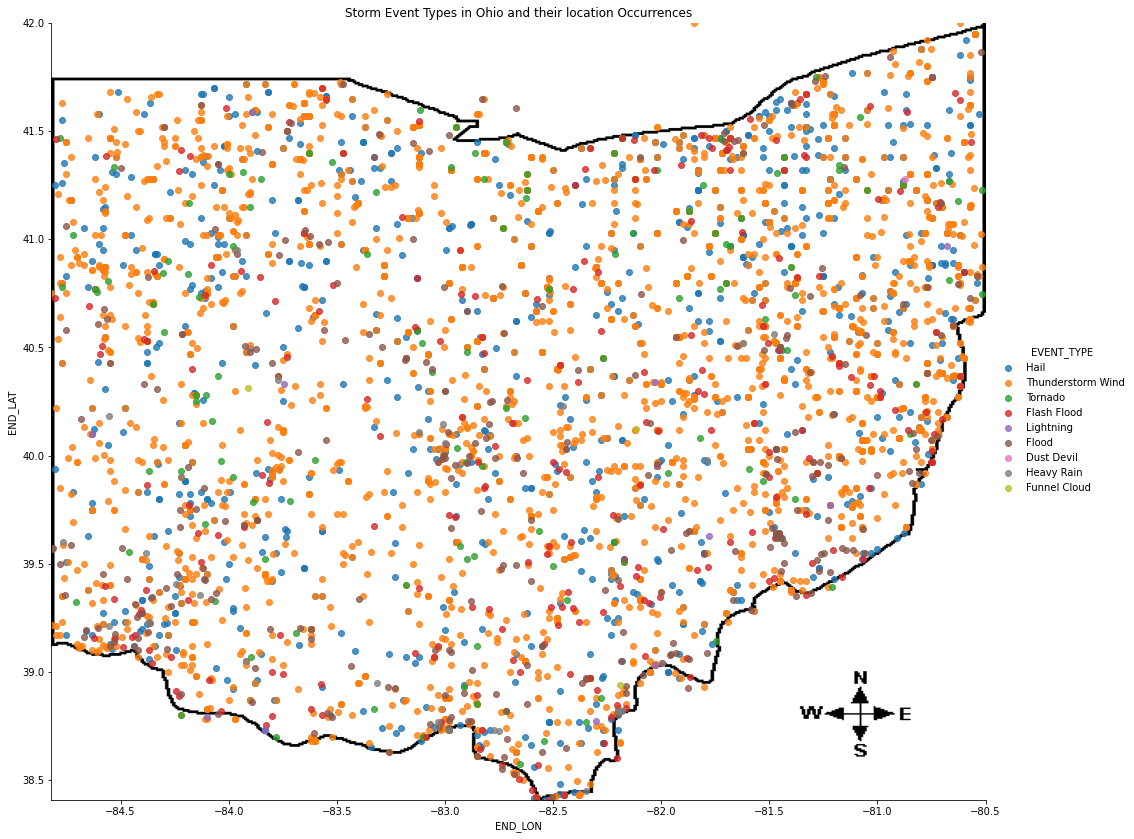

In [6]:
#Visualizing as a scatter plot
#To accomplish the following goal:
#We can either use the points in the second line below or the points in third line below
# fig, ax = plt.subplots(figsize=(12,12))
# ax.scatter(geo_plot_df.BEGIN_LON, geo_plot_df.BEGIN_LAT, zorder=1)
# ax.scatter(geo_plot_df.END_LON, geo_plot_df.END_LAT, zorder=1)
#Or
# To accomplish most of the following goal:
#Find out what storm event is most common in a certain state and where in the state it occurs.
#we can instead use just the line of code below instead of the line of code above ax.scatter()
graph = sns.lmplot(x='END_LON', y='END_LAT', data=geo_plot_df, hue='EVENT_TYPE', fit_reg=False, height=14, aspect=1, facet_kws={'legend_out': True})
ax = graph.ax

BBox = (
    geo_plot_df.BEGIN_LON.min(),
    geo_plot_df.BEGIN_LON.max(),
    geo_plot_df.BEGIN_LAT.min(),
    geo_plot_df.BEGIN_LAT.max()
)
# graph._legend.size(10)
ax.set_title('Storm Event Types in Ohio and their location Occurrences')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(ohio_img, zorder=0, extent = BBox, aspect='equal')

In [7]:
#Following visualization could probably be used
# to answer one of the research questions or to
# accomplish one of the visual analytics goals:
# Website where the distance formula was found:
# Radius of earth: 6371km
# http://janmatuschek.de/LatitudeLongitudeBoundingCoordinates
sin_begin_lat = np.sin(graph_plot_df['BEGIN_LAT'])
sin_end_lat = np.sin(graph_plot_df['END_LAT'])
cos_begin_lat = np.cos(graph_plot_df['BEGIN_LAT'])
cos_end_lat = np.cos(graph_plot_df['END_LAT'])
cos_lon_diff = np.cos(graph_plot_df['BEGIN_LON'] - graph_plot_df['END_LON'])
arc_cos_param = sin_begin_lat*sin_end_lat + cos_begin_lat*cos_end_lat*cos_lon_diff

arc_cos_param[arc_cos_param > 1] = 1.0
graph_plot_df['TOTAL_DISTANCE'] = np.arccos(arc_cos_param)*6371

In [8]:
ohio_no_displacement = graph_plot_df.loc[graph_plot_df['TOTAL_DISTANCE'] == 0].shape[0] / graph_plot_df.shape[0] * 100
ohio_displacement_between_0_and_10 = graph_plot_df.loc[(graph_plot_df['TOTAL_DISTANCE'] <= 10) & (graph_plot_df['TOTAL_DISTANCE'] > 0)].shape[0] / graph_plot_df.shape[0] * 100
ohio_displacement_between_11_and_100 = graph_plot_df.loc[(graph_plot_df['TOTAL_DISTANCE'] <= 100) & (graph_plot_df['TOTAL_DISTANCE'] > 10)].shape[0] / graph_plot_df.shape[0] * 100
ohio_displacement_between_100_and_1000 = graph_plot_df.loc[(graph_plot_df['TOTAL_DISTANCE'] <= 1000) & (graph_plot_df['TOTAL_DISTANCE'] > 100)].shape[0] / graph_plot_df.shape[0] * 100
ohio_displacement_between_1000_and_10000 = graph_plot_df.loc[(graph_plot_df['TOTAL_DISTANCE'] <= 10000) & (graph_plot_df['TOTAL_DISTANCE'] > 1000)].shape[0] / graph_plot_df.shape[0] * 100
ohio_displacement_between_10000_and_20000 = graph_plot_df.loc[(graph_plot_df['TOTAL_DISTANCE'] <= 20000) & (graph_plot_df['TOTAL_DISTANCE'] > 10000)].shape[0] / graph_plot_df.shape[0] * 100
storm_displacements = pd.DataFrame([[0, ohio_no_displacement], ['0-10', ohio_displacement_between_0_and_10], ['11-100', ohio_displacement_between_11_and_100], ['101-1000', ohio_displacement_between_100_and_1000], ['1001-10000', ohio_displacement_between_1000_and_10000],['10001-20000', ohio_displacement_between_10000_and_20000]], columns=['Distance Range (in km)', 'Percent'])
#Verify it adds up to 100 percent
# ohio_displacement_between_10000_and_20000 + ohio_displacement_between_1000_and_10000 + ohio_displacement_between_100_and_1000 + ohio_displacement_between_11_and_100 + ohio_displacement_between_0_and_10 + ohio_no_displacement
storm_displacements

,Distance Range (in km),Percent
0,0,39.551917
1,0-10,10.168031
2,11-100,2.111159
3,101-1000,11.137441
4,1001-10000,35.200345
5,10001-20000,1.831107


<AxesSubplot:xlabel='Distance Range (in km)', ylabel='Percent'>

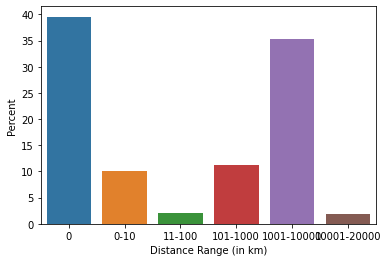

In [9]:
sns.barplot(x='Distance Range (in km)', y='Percent', data= storm_displacements)